In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns

In [6]:
path = '/content/drive/MyDrive/CSV file for Corp Recommendation Model Creation/crop recommondation train data.csv'
df = pd.read_csv(path)

In [7]:
# df.drop(df.columns[0], axis=1, inplace=True)
df.shape

(1980, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

apple          90
banana         90
rice           90
pomegranate    90
pigeonpeas     90
papaya         90
orange         90
muskmelon      90
mungbean       90
mothbeans      90
mango          90
maize          90
lentil         90
kidneybeans    90
jute           90
grapes         90
cotton         90
coffee         90
coconut        90
chickpea       90
blackgram      90
watermelon     90
Name: label, dtype: int64

In [12]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,29,144,204,22.433245,92.486677,5.800449,119.102519,apple
1,25,143,198,22.812125,91.518617,6.027314,107.855225,apple
2,9,137,200,21.121521,90.687877,5.636687,102.801720,apple
3,37,126,196,23.599973,90.975977,5.596449,107.172819,apple
4,2,120,203,23.126527,94.712033,5.893493,108.621183,apple


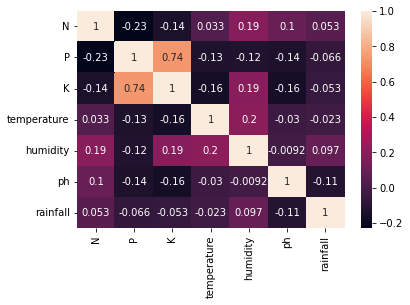

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
target_data = df['label']
input_data = df.copy()
input_data.drop('label', axis=1, inplace=True)
input_data.head()


,N,P,K,temperature,humidity,ph,rainfall
0,29,144,204,22.433245,92.486677,5.800449,119.102519
1,25,143,198,22.812125,91.518617,6.027314,107.855225
2,9,137,200,21.121521,90.687877,5.636687,102.801720
3,37,126,196,23.599973,90.975977,5.596449,107.172819
4,2,120,203,23.126527,94.712033,5.893493,108.621183


In [15]:
target_data

0            apple
1            apple
2            apple
3            apple
4            apple
           ...    
1975    watermelon
1976    watermelon
1977    watermelon
1978    watermelon
1979    watermelon
Name: label, Length: 1980, dtype: object

In [16]:
accuracy = []
model = []

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_data, target_data, test_size = 0.2, random_state=2)

# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.93939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        17
   blackgram       0.83      0.88      0.86        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.42      0.59        19
 kidneybeans       1.00      0.84      0.91        19
      lentil       0.89      1.00      0.94        16
       maize       1.00      0.45      0.62        11
       mango       1.00      1.00      1.00        15
   mothbeans       0.70      0.90      0.79        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, input_data, target_data, cv=5)
score

array([0.91666667, 0.92424242, 0.93181818, 0.93181818, 0.90909091])

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Baiyes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9974747474747475
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        11
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00 

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,input_data,target_data,cv=5)
score

array([0.99494949, 0.99242424, 0.99494949, 0.99747475, 0.99494949])

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine

In [24]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.09343434343434344
              precision    recall  f1-score   support

       apple       1.00      0.17      0.29        18
      banana       1.00      0.06      0.11        17
   blackgram       0.00      0.00      0.00        17
    chickpea       1.00      0.17      0.29        18
     coconut       0.00      0.00      0.00        15
      coffee       0.00      0.00      0.00        24
      cotton       1.00      0.12      0.22        24
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.05      0.10        19
 kidneybeans       1.00      0.05      0.10        19
      lentil       0.00      0.00      0.00        16
       maize       0.03      1.00      0.06        11
       mango       1.00      0.20      0.33        15
   mothbeans       0.00      0.00      0.00        21
    mungbean       1.00      0.05      0.10        20
   muskmelon       1.00      0.26      0.42        19
      orange       1.00      0.04      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,input_data,target_data,cv=5)
score

array([0.27777778, 0.28787879, 0.27020202, 0.28282828, 0.24242424])

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2, max_iter=1000)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9671717171717171
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        15
      coffee       0.96      1.00      0.98        24
      cotton       0.92      0.96      0.94        24
      grapes       1.00      1.00      1.00        14
        jute       0.94      0.89      0.92        19
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.88      0.88      0.88        16
       maize       0.90      0.82      0.86        11
       mango       1.00      1.00      1.00        15
   mothbeans       0.86      0.86      0.86        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,input_data,target_data,cv=5)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.96717172, 0.97474747, 0.95707071, 0.96717172, 0.97222222])

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        14
        jute       1.00      1.00      1.00        19
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        11
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        23
    

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF, input_data, target_data,cv=5)
score

array([0.99494949, 0.99242424, 0.99494949, 0.99747475, 0.99494949])

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XG Booster

In [32]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9949494949494949
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.96      0.98        24
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        14
        jute       0.95      0.95      0.95        19
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        11
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00     

In [33]:
# Cross validation score (XGBoost)
score = cross_val_score(XB, input_data, target_data, cv=5)
score

array([0.99494949, 0.99494949, 0.99494949, 0.98989899, 0.98989899])

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [35]:
import matplotlib.pyplot as plt

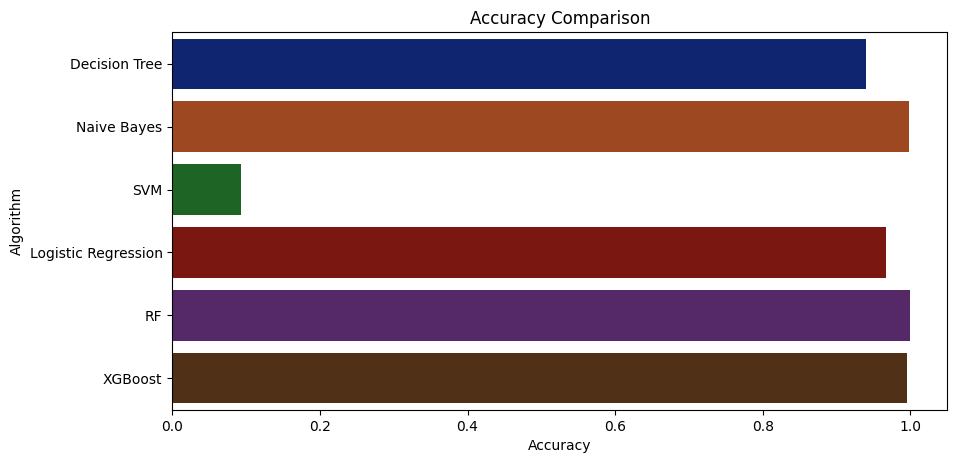

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy, y = model,palette='dark')

In [37]:
accuracy

[0.9393939393939394,
 0.9974747474747475,
 0.09343434343434344,
 0.9671717171717171,
 1.0,
 0.9949494949494949]

In [38]:
final_predict = pd.read_csv('/content/drive/MyDrive/CSV file for Corp Recommendation Model Creation/final predicting data.csv', index_col=False )

In [39]:
yfinal_pred = final_predict['label']
Xfinal_pred = final_predict.drop('label', axis=1, inplace=False)
print(yfinal_pred)

0           apple
1           apple
2           apple
3           apple
4           apple
          ...    
215    watermelon
216    watermelon
217    watermelon
218    watermelon
219    watermelon
Name: label, Length: 220, dtype: object


In [40]:
predictions = NaiveBayes.predict(Xfinal_pred)

In [48]:
indexes = []
i = 0

for real, predi in zip(yfinal_pred, predictions):
  if real == predi :
    indexes.append(i)
  else:
    print(real)
  i += 1

final_predict.head()


rice


,N,P,K,temperature,humidity,ph,rainfall,label
0,38,135,203,23.761218,93.661643,5.965551,100.825956,apple
1,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
2,26,122,202,22.445170,94.737635,5.617227,107.184327,apple
3,35,131,203,22.427761,93.917224,5.893491,102.723074,apple
4,35,128,205,21.072734,93.565860,6.041054,107.873701,apple


In [49]:
final_predict.shape

(220, 8)

In [50]:
len(indexes)

219

In [52]:
final_predict.iloc[indexes]

,N,P,K,temperature,humidity,ph,rainfall,label
0,38,135,203,23.761218,93.661643,5.965551,100.825956,apple
1,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
2,26,122,202,22.445170,94.737635,5.617227,107.184327,apple
3,35,131,203,22.427761,93.917224,5.893491,102.723074,apple
4,35,128,205,21.072734,93.565860,6.041054,107.873701,apple
...,...,...,...,...,...,...,...,...
215,85,27,45,26.071376,88.728566,6.467096,57.796528,watermelon
216,88,5,47,25.864755,86.674680,6.662245,41.165548,watermelon
217,120,7,47,24.247825,83.036879,6.653868,54.765762,watermelon
218,105,14,50,26.214884,87.688398,6.419052,59.655908,watermelon


In [54]:
final_predict.to_csv('Final Data csv beforre max and min.csv', index=False)